In [163]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Green Screen mini-project

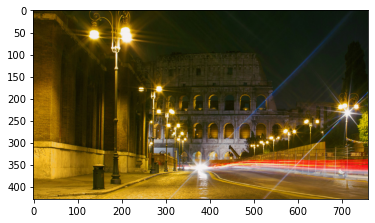

In [164]:
# a background
pic = cv2.imread('img/night1.jpg')
rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_pic)

In [165]:
print(pic.dtype, pic.shape)

uint8 (428, 760, 3)


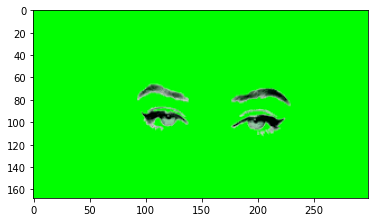

In [166]:
# greenscreen background
pic_green = cv2.imread('img/green_screen.png')
rgb_green = cv2.cvtColor(pic_green, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_green)

In [170]:
print(pic_green.dtype, pic_green.shape)

uint8 (168, 299, 3)


In [171]:
# resize to be same size
normal = cv2.resize(rgb_pic,(298,168))
green = cv2.resize(rgb_green,(298,168))


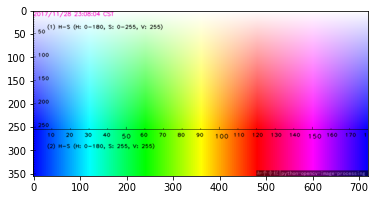

In [174]:
#use masking
hsv_map = cv2.imread('img/hsv.png')
#plt.figure(figsize = (12,10))
plt.imshow(hsv_map)

In [175]:
#for green
lower_bound = (38,40, 20)
upper_bound = (85, 255,255)

In [176]:
hsv_image = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_image, lower_bound,upper_bound)

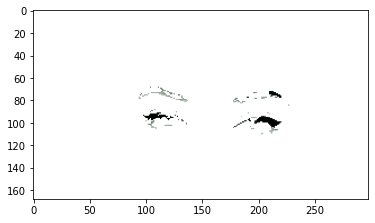

In [179]:
masked = green.copy()
masked[mask!=0] = (255, 255, 255)
plt.imshow(masked)

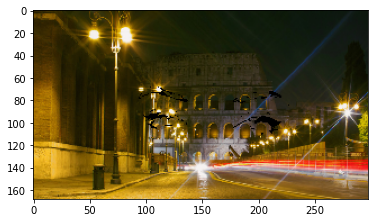

In [180]:
final_image = cv2.bitwise_and(normal,masked,mask=mask)
plt.imshow(final_image)

In [ ]:
# adapt it to use webcam...

### Handwriting recognition mini-project

In [2]:
numbers = cv2.imread('my_numbers.jpg')

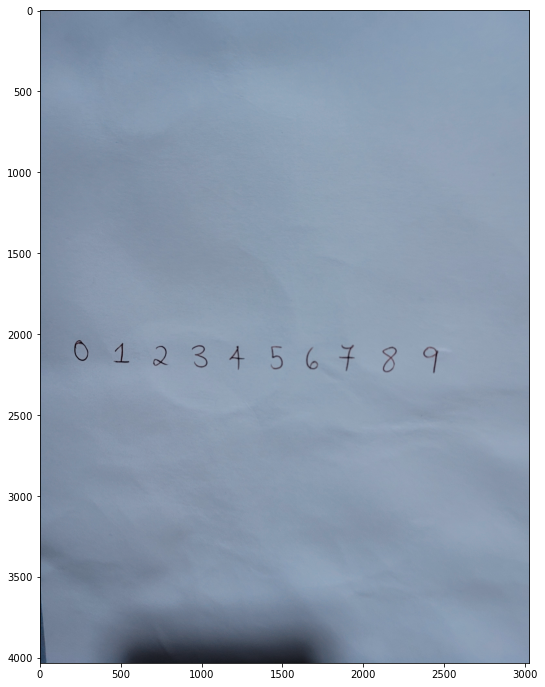

In [6]:
plt.figure(figsize = (15,12))
plt.imshow(numbers)

In [59]:
# crop numbers  (image[y1:y2, x1:x2])
num_img = numbers.copy()
zero = num_img[2000:2200, 200:350]
one = num_img[2000:2200, 420:570]
two = num_img[2000:2200, 650:800]
three = num_img[2000:2200, 900:1050]
four = num_img[2000:2200, 1150:1300]
five = num_img[2060:2210, 1350:1500]
six = num_img[2070:2220, 1600:1750]
seven = num_img[2070:2220, 1800:1950]
eight = num_img[2070:2220, 2050:2200]
nine = num_img[2070:2220, 2350:2500]

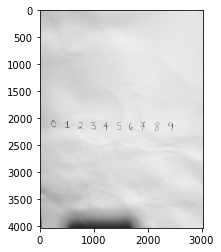

In [90]:
grey = cv2.cvtColor(numbers, cv2.COLOR_BGR2GRAY)
#plt.figure(figsize = (10,8))
plt.imshow(grey, cmap = 'gray')

In [114]:
#create function, black background, white writing and 28x28 size
def preproc(img):
    #convert pics to greyscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #resize
    gray_img = cv2.resize(gray_img,(28,28))

    #change colour using otsu
    ret, otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
    #return plt.imshow(otsu, cmap = 'gray')
    return otsu

In [119]:
# running images through preprocessing function
zero_clean = preproc(zero)
one_clean = preproc(one)
two_clean = preproc(two)
three_clean = preproc(three)
four_clean = preproc(four)
five_clean = preproc(five)
six_clean = preproc(six)
seven_clean = preproc(seven)
eight_clean = preproc(eight)
nine_clean = preproc(nine)

In [120]:
# saving images to files
cv2.imwrite('numbers/zero.png',zero_clean)
cv2.imwrite('numbers/one.png',one_clean)
cv2.imwrite('numbers/two.png',two_clean)
cv2.imwrite('numbers/three.png',three_clean)
cv2.imwrite('numbers/four.png',four_clean)
cv2.imwrite('numbers/five.png',five_clean)
cv2.imwrite('numbers/six.png',six_clean)
cv2.imwrite('numbers/seven.png',seven_clean)
cv2.imwrite('numbers/eight.png',eight_clean)
cv2.imwrite('numbers/nine.png',nine_clean)

True

In [ ]:
# pass images through classifier